<a href="https://colab.research.google.com/github/nikoshaa/2141720007-machine-learning-2023/blob/main/Week-12/Tugas_JS_12_Optical_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wildan Hafidz Mauludin**

**2141720007**

**Tugas**

**Mendeteksi orientasi teks dan jenis skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

**Tugas:**

**1. Persiapan Gambar:**

- Gunakan gambar contoh yang disediakan ('**hitchhikers-rotated.png**').
- Tampilkan gambar asli menggunakan Python dan OpenCV.

**2. Deteksi Orientasi dan Skrip:**

- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (**angle**) dan jenis skrip (**script**).
- Tampilkan hasil orientasi dan jenis skrip.

**Jawab**

**Instalasi dan Import Library**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,068 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_DIR = '/content/drive/MyDrive/images/'

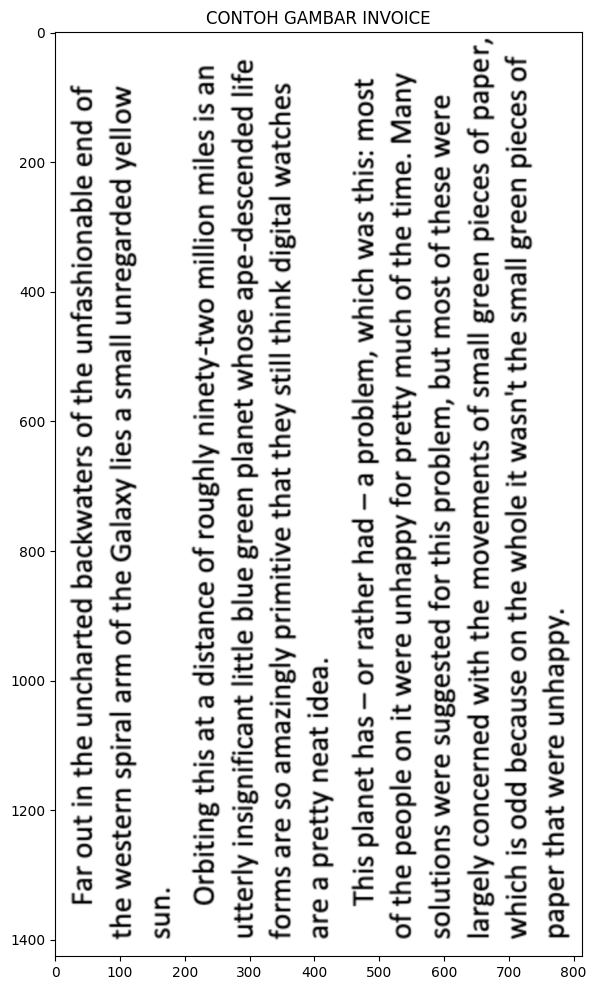

In [ ]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()


**Ubah gambar ke grayscale**

In [ ]:
gray_image = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

**Mendeteksi Sudut Rotasi dan Jenis Skrip**

In [ ]:
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow

Sudut Rotasi: 98.60114180754755 degrees
Jenis Skrip: 
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



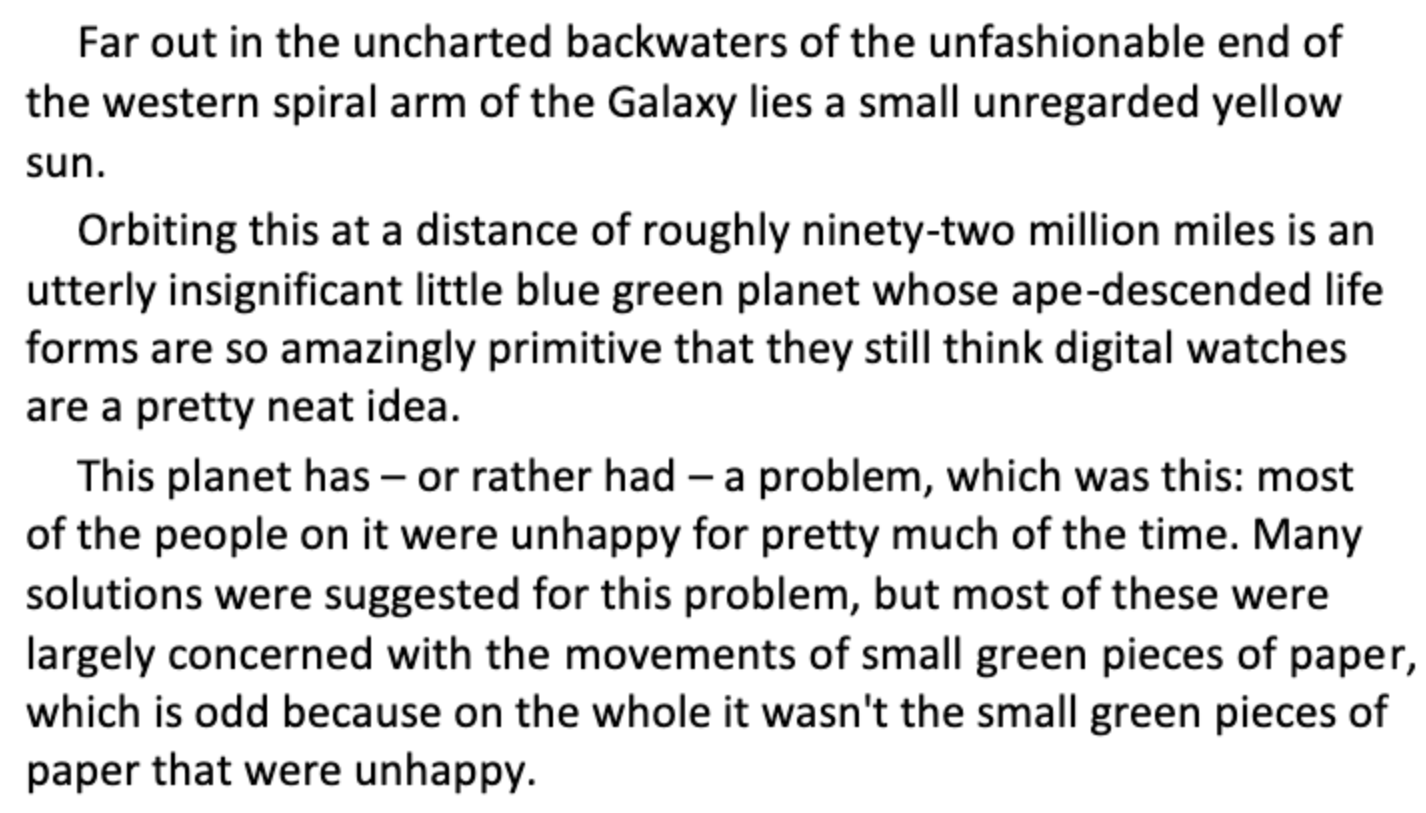

In [ ]:
import cv2
import numpy as np
from PIL import Image
import pytesseract


# Save the image to a temporary file (Tesseract requires file input)
temp_image_path = '/content/drive/MyDrive/images/tmp/temp_image.png'
cv2.imwrite(temp_image_path, image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to find potential lines
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines in the image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Calculate the average angle of detected lines
if lines is not None:
    angles = []
    for line in lines:
        rho, theta = line[0]
        angle = theta * (180 / np.pi)
        angles.append(angle)
    average_angle = np.mean(angles)
else:
    average_angle = 0

# Rotate the image based on the calculated average angle
rotated_image = image.copy()
if abs(average_angle) > 1:  # Adjust this threshold as needed
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE if average_angle > 0 else cv2.ROTATE_90_COUNTERCLOCKWISE)

# Save the rotated image to a temporary file
cv2.imwrite(temp_image_path, rotated_image)

# Detect script type
script_type = pytesseract.image_to_string(Image.fromarray(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)), config=custom_config)

# Display results
print(f'Sudut Rotasi: {average_angle} degrees')
print(f'Jenis Skrip: \n{script_type}')

# Display the rotated image
cv2_imshow(rotated_image)

### **Kesimpulan**

Program di atas mengimplementasikan deteksi sudut rotasi dan pengenalan teks pada suatu gambar menggunakan teknik deteksi garis dengan Hough Line Transform dan Optical Character Recognition (OCR) dengan Tesseract. Gambar disimpan ke file sementara, kemudian diubah ke skala abu-abu dan dikenai deteksi tepi.

Deteksi garis menggunakan transformasi Hough Line, diikuti dengan perhitungan rata-rata sudut garis untuk mendeteksi rotasi. Jika sudut rata-rata signifikan, gambar diputar searah atau berlawanan arah jarum jam sesuai dengan nilai sudut tersebut.

Setelah rotasi, program menggunakan Tesseract untuk melakukan OCR dan mendapatkan jenis teks pada gambar. Hasil akhirnya adalah informasi tentang sudut rotasi dan jenis teks yang diprint.